In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
URL = (r'C:\Users\Shahabid\Desktop\NW IN Python Project\Inp Data - first outcome.xlsx')
inpatient = pd.read_excel (URL)

In [3]:
inpatient.shape

(57196, 104)

In [4]:
inpatient = inpatient.head(5000)

In [5]:
inpatient.shape

(5000, 104)

In [6]:
inpatient.columns

Index(['Unnamed: 0', 'Entity Code & Name', 'Patient Account Number',
       'Patient Med Rec No', 'Patient Class Desc', 'Admit Date',
       'Discharge Date', 'LOS Acute', 'LOS ICU', 'Patient Age',
       ...
       'ICD-10 DX Code 3presum', 'ICD-10 DX Code 4presum',
       'ICD-10 DX Code 5presum', 'Any Presumptive Code', 'Presumptive',
       'RIC_S2', 'Final_RIC_Desc', 'Final_RIC_Group', 'Counter', 'Count'],
      dtype='object', length=104)

In [7]:
def losICU(x):
    if x==0:
        x = 0
    if 0 > x >= 3:
        x = 1
    if 4 > x :
        x = 2

inpatient['ICU'] = inpatient['LOS ICU'].apply(losICU)

In [8]:
def dcdispcode(x):
    if x=='Home':
        x = 1
    if x == 'LTACH':
        x = 2
    if x == 'HHA':
        x = 3
    if x == 'SNF':
        x = 4
    if x == 'IRF':
        x = 5
    if x == 'Other':
        x = 6

inpatient['DC_Code'] = inpatient['KHRS_Dc_Disp'].apply(dcdispcode)

In [9]:
def KHRSPayorcode(x):
    if x=='Charity':
        x = 1
    if x == 'Comm Mc':
        x = 2
    if x == 'MCR MC':
        x = 3
    if x == 'MCR':
        x = 4
    if x == 'MCD':
        x = 5
    if x == 'Gov Other':
        x = 6
    if x == 'Comm':
        x = 7
        
inpatient['KHRS_Payor_code'] = inpatient['KHRS_Payor'].apply(KHRSPayorcode)

In [10]:
inpatient.drop(['Unnamed: 0', 'Entity Code & Name', 'Financial Class Name','ICD-10-CM Prin Diag Code','ICD-10 DX Code 2', 
                'ICD-10 DX Code 3', 'ICD-10 DX Code 4', 'ICD-10 DX Code 5', 'ICD-10 DX Code 6','ICD-10 DX Code 7',
                'ICD-10 DX Code 8', 'ICD-10 DX Code 9','ICD-10 DX Code 10','ICD-10 DX Code 11','ICD-10 DX Code 12','DRG_GMLOS',
                'Patient Account Number', 'LOS Acute','Patient Med Rec No', 'Patient Class Desc', 'Admit Date','Discharge Date',
                'Patient Zip', 'Final Destination Name', 'First Therpy Date-PT','First Therpy Date-OT','First Therpy Date-SLP',
                'DC Date_YY-Q',  'DC Date_YY-MM', 'DC Date_YY','Payor_Key_main', 'MS-DRG Name', 'Product Line', 'DRG_MDC',
                'Financial Class Name','Discharge Status Code','Prin Proc ICD-10-PCS CodePROC','ICD-10-PCS Code-2PROC', 
                'ICD-10-PCS Code-3PROC', 'ICD-10-PCS Code-4PROC', 'ICD-10-PCS Code-5PROC', 'MO', 'Comorbid', '90', 'TF1', 
                'TF2', '91', 'TF3', 'TF4', 'PROC', 'ICD-10-CM Prin Diag Code_RIC', 'ICD-10 DX Code 2_RIC', 
                'ICD-10 DX Code 3_RIC', 'ICD-10 DX Code 4_RIC', 'ICD-10 DX Code 5_RIC', 'RIC_99', 'RIC_S1a', 'RIC_S1b', 
                'ICD-10 DX Code 2presum', 'ICD-10 DX Code 3presum', 'ICD-10 DX Code 4presum', 'ICD-10 DX Code 5presum',
                'Presumptive','Counter', 'Count','Final_RIC_Group','Final_RIC_Group','Primary Payor Plan Name',
                'ICD-10-PCS Code-6', 'ICD-10-PCS Code-7', 'ICD-10-PCS Code-8', 'ICD-10-PCS Code-9', 'ICD-10-PCS Code-10',
                'ICD-10-PCS Code-11', 'ICD-10-PCS Code-12','KHRS_Payor','Final_RIC_Desc' ], axis = 1, inplace=True)

In [11]:
icd_DXandPX_list = ['Prin Proc ICD-10-PCS Code', 'ICD-10-PCS Code-2', 'ICD-10-PCS Code-3', 'ICD-10-PCS Code-4', 'ICD-10-PCS Code-5', 
 'ICD-10-CM Prin Diag Codev0', 'ICD-10 DX Code 2v0', 'ICD-10 DX Code 3v0', 
 'ICD-10 DX Code 4v0', 'ICD-10 DX Code 5v0', 'ICD-10 DX Code 6v0', 'ICD-10 DX Code 7v0', 'ICD-10 DX Code 8v0',
 'ICD-10 DX Code 9v0', 'ICD-10 DX Code 10v0', 'ICD-10 DX Code 11v0', 'ICD-10 DX Code 12v0']

for x in inpatient[icd_DXandPX_list]:
        inpatient[x] = inpatient[x].astype(str)

In [12]:
inpatient.columns

Index(['LOS ICU', 'Patient Age', 'DRG Code', 'Prin Proc ICD-10-PCS Code',
       'ICD-10-PCS Code-2', 'ICD-10-PCS Code-3', 'ICD-10-PCS Code-4',
       'ICD-10-PCS Code-5', 'PT Eval', 'OT Eval', 'SLP  Eval', 'KHRS_LOS',
       'KHRS_Dc_Disp', 'DRG_Weight', 'ICD-10-CM Prin Diag Codev0',
       'ICD-10 DX Code 2v0', 'ICD-10 DX Code 3v0', 'ICD-10 DX Code 4v0',
       'ICD-10 DX Code 5v0', 'ICD-10 DX Code 6v0', 'ICD-10 DX Code 7v0',
       'ICD-10 DX Code 8v0', 'ICD-10 DX Code 9v0', 'ICD-10 DX Code 10v0',
       'ICD-10 DX Code 11v0', 'ICD-10 DX Code 12v0', 'Age_85>',
       'Any Presumptive Code', 'RIC_S2', 'ICU', 'DC_Code', 'KHRS_Payor_code'],
      dtype='object')

In [13]:
inpatient.loc[:,['Prin Proc ICD-10-PCS Code', 'ICD-10-PCS Code-2', 'ICD-10-PCS Code-3', 
              'ICD-10-PCS Code-4','ICD-10-PCS Code-5', 'ICD-10-CM Prin Diag Codev0','ICD-10 DX Code 2v0', 'ICD-10 DX Code 3v0', 'ICD-10 DX Code 4v0',
              'ICD-10 DX Code 5v0', 'ICD-10 DX Code 6v0', 'ICD-10 DX Code 7v0','ICD-10 DX Code 8v0', 'ICD-10 DX Code 9v0',
              'ICD-10 DX Code 10v0', 'ICD-10 DX Code 11v0', 'ICD-10 DX Code 12v0']]

,Prin Proc ICD-10-PCS Code,ICD-10-PCS Code-2,ICD-10-PCS Code-3,ICD-10-PCS Code-4,ICD-10-PCS Code-5,ICD-10-CM Prin Diag Codev0,ICD-10 DX Code 2v0,ICD-10 DX Code 3v0,ICD-10 DX Code 4v0,ICD-10 DX Code 5v0,ICD-10 DX Code 6v0,ICD-10 DX Code 7v0,ICD-10 DX Code 8v0,ICD-10 DX Code 9v0,ICD-10 DX Code 10v0,ICD-10 DX Code 11v0,ICD-10 DX Code 12v0
0,0UT20ZZ,0UT40ZZ,0UT70ZZ,nan,nan,D25,D26,E03,Z79,nan,nan,nan,nan,nan,nan,nan,nan
1,07DR3ZX,07DR3ZX,02HV33Z,6A551Z3,02H633Z,C95,D61,J15,K56,K92,D63,R16,K76,E87,Z87,R04,K59
2,0DH64UZ,02HV33Z,nan,nan,nan,I82,J18,I25,E78,I11,I48,E11,Z79,Z86,Z87,I25,I82
3,0SRD069,3E0T3BZ,nan,nan,nan,M17,Z96,G47,E78,E78,Z85,Z87,Z79,nan,nan,nan,nan
4,047Q3ZZ,0JBR0ZZ,0JBR0ZZ,0JBR0ZZ,0JBR0ZZ,A41,I50,J96,G93,J18,I13,E87,N17,L03,L03,M86,E11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0DB68ZX,0W3P8ZZ,0DJD8ZZ,nan,nan,D62,K92,K55,E11,I25,I48,D50,E78,I10,E03,H90,I44
4996,0JBL0ZZ,02HV33Z,0HDHXZZ,0HBHXZZ,nan,L89,J96,E44,Z68,B95,J44,F03,I25,M19,Z86,Z95,Z87
4997,0DB58ZX,0DB68ZX,nan,nan,nan,K92,K22,K29,K21,K25,I95,E86,G47,I25,M19,F32,E11
4998,0SG30AJ,00NY0ZZ,01NN0ZZ,01NB0ZZ,01NR0ZZ,M51,M51,E03,F17,nan,nan,nan,nan,nan,nan,nan,nan


In [14]:
def nanmanaged(x):
    if x!='':
        x = x
    if x == '':
        x = np.nan
allcolumns = ['LOS ICU', 'Patient Age', 'DRG Code', 'Prin Proc ICD-10-PCS Code', 'ICD-10-PCS Code-2', 'ICD-10-PCS Code-3', 
              'ICD-10-PCS Code-4','ICD-10-PCS Code-5', 'PT Eval', 'OT Eval', 'SLP  Eval', 'KHRS_LOS', 'KHRS_Dc_Disp', 
              'DRG_Weight', 'ICD-10-CM Prin Diag Codev0','ICD-10 DX Code 2v0', 'ICD-10 DX Code 3v0', 'ICD-10 DX Code 4v0',
              'ICD-10 DX Code 5v0', 'ICD-10 DX Code 6v0', 'ICD-10 DX Code 7v0','ICD-10 DX Code 8v0', 'ICD-10 DX Code 9v0',
              'ICD-10 DX Code 10v0', 'ICD-10 DX Code 11v0', 'ICD-10 DX Code 12v0', 'Age_85>', 'Any Presumptive Code', 
              'RIC_S2', 'ICU', 'DC_Code', 'KHRS_Payor_code']
for x in allcolumns:
    inpatient[x] = inpatient[x].fillna(0)
    
    
# for x in inpatient[allcolumns]:
#         inpatient[x] = inpatient[x].astype(str)

In [15]:
inpatient = pd.get_dummies(inpatient, columns=['Prin Proc ICD-10-PCS Code', 'ICD-10-PCS Code-2', 'ICD-10-PCS Code-3', 'ICD-10-PCS Code-4', 'ICD-10-PCS Code-5',
                                               'ICD-10-CM Prin Diag Codev0', 'ICD-10 DX Code 2v0', 'ICD-10 DX Code 3v0', 'ICD-10 DX Code 4v0', 'ICD-10 DX Code 5v0',
       'ICD-10 DX Code 6v0', 'ICD-10 DX Code 7v0', 'ICD-10 DX Code 8v0', 'ICD-10 DX Code 9v0', 'ICD-10 DX Code 10v0',
       'ICD-10 DX Code 11v0', 'ICD-10 DX Code 12v0'])

In [33]:
inpatient.head(5)

,LOS ICU,Patient Age,DRG Code,PT Eval,OT Eval,SLP Eval,KHRS_LOS,KHRS_Dc_Disp,DRG_Weight,Age_85>,...,ICD-10 DX Code 12v0_Z90,ICD-10 DX Code 12v0_Z91,ICD-10 DX Code 12v0_Z92,ICD-10 DX Code 12v0_Z93,ICD-10 DX Code 12v0_Z94,ICD-10 DX Code 12v0_Z95,ICD-10 DX Code 12v0_Z96,ICD-10 DX Code 12v0_Z98,ICD-10 DX Code 12v0_Z99,ICD-10 DX Code 12v0_nan
0,0.0,51,743.0,0,0,0,3,Home,1.1156,0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,57,834.0,1,0,0,38,Home,5.5078,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,68,299.0,0,1,1,35,LTACH,1.4504,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,67,470.0,1,1,0,2,Home,1.9898,0,...,0,0,0,0,0,0,0,0,0,1
4,2.0,62,853.0,1,1,0,26,LTACH,5.0571,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
inpatient.shape

(5000, 7743)

In [18]:
x = inpatient.drop('KHRS_Dc_Disp', axis = 1)
y = inpatient[['KHRS_Dc_Disp']]

In [19]:
# pd.plotting.scatter_matrix(x, c = y, figsize = [11,11], s = 150);

# KNN Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski',  algorithm='auto', leaf_size=30, p=2,)
# metrics could be Minkowski, Manhatan, Euclidean

x = inpatient.drop('KHRS_Dc_Disp', axis = 1)
y = inpatient[['KHRS_Dc_Disp']]



In [22]:
knn.fit(x,y)

C:\Users\Shahabid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state = 42, stratify = y)

In [25]:
x_train.shape

(3500, 7742)

In [26]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
y_predict

C:\Users\Shahabid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array(['Home', 'HHA', 'HHA', ..., 'Home', 'Home', 'Home'], dtype=object)

In [27]:
knn.score(x_test, y_test)

0.6053333333333333

C:\Users\Shahabid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Shahabid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Shahabid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Shahabid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

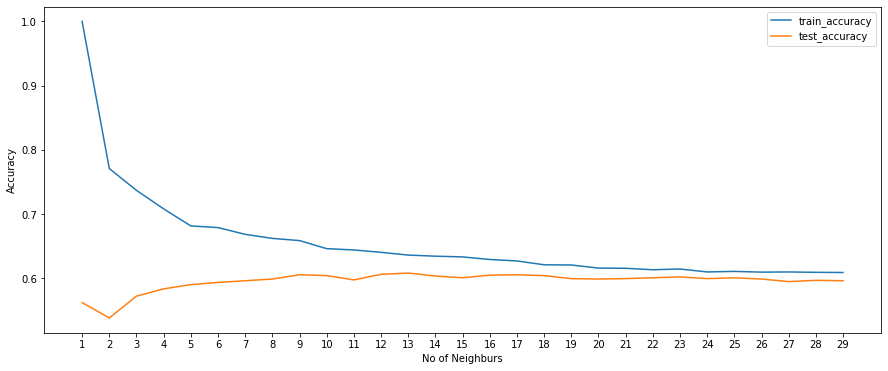

In [28]:
neigburs = np.arange(1,30)
train_accuracy = np.empty(len(neigburs))
test_accuracy = np.empty(len(neigburs))

for i, k in enumerate(neigburs):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    train_accuracy[i] = knn_model.score(x_train, y_train)
    test_accuracy[i] = knn_model.score(x_test, y_test)
    
plt.figure(figsize=(15,6))
plt.plot(neigburs, train_accuracy, label = 'train_accuracy' )
plt.plot(neigburs, test_accuracy, label = 'test_accuracy' )
plt.legend()
plt.xlabel('No of Neighburs')
plt.ylabel('Accuracy')
plt.xticks(np.empty(len(neigburs)));


# Decision Tree

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state = 42, stratify = y)

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
predict_dtc = dtc.predict(x_test)

In [31]:
from sklearn import metrics

In [32]:
metrics.accuracy_score(y_test, predict_dtc)

0.5826666666666667